https://medium.com/@a.r.amouzad.m/how-to-get-state-of-the-art-result-on-graph-classification-with-gnn-73afadff5d49

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [65]:
MUTAG = TUDataset(
    root=r'C:\Users\Homelander\Desktop\ANN Phase (2)',
    name='MUTAG'
)

In [66]:
from random import randint

graph = MUTAG[randint(0, 188)]

In [67]:
print(
    f'Dataset Size: {len(MUTAG)} graphs\n',
    f'Classes: {MUTAG.num_classes}\n',
    f'Features per node: {MUTAG.num_node_features}\n'
    f'\tSample no. of nodes in graph: {graph.num_nodes}\n',
    f'\tSample no. of edges in graph: {graph.num_edges}\n',
    f'\tSample node feature shape: {graph.x.shape}\n',
    f'\tSample edge index shape: {graph.edge_index.shape}\n'
)

Dataset Size: 188 graphs
 Classes: 2
 Features per node: 7
	Sample no. of nodes in graph: 19
 	Sample no. of edges in graph: 44
 	Sample node feature shape: torch.Size([19, 7])
 	Sample edge index shape: torch.Size([2, 44])



In [68]:
def plot_graph(graph, title="Graph", node_color='lightblue'):
    G = nx.Graph()
    
    edge_index = graph.edge_index.cpu().numpy()
    for i in range(edge_index.shape[1]):
        G.add_edge(edge_index[0][i].item(), edge_index[1][i].item())  # Ensure indices are integers

    # Create node labels based on the graph's node features
    pos = nx.spring_layout(G)  # You can choose a layout algorithm like spring_layout
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_color, font_weight='bold')
    plt.title(title)
    plt.show()

In [69]:
node_names = {
    0: 'C',  # Carbon
    1: 'N',  # Nitrogen
    2: 'O',  # Oxygen
    3: 'F',  # Fluorine
    4: 'I',  # Iodine
    5: 'Cl', # Chlorine
    6: 'Br'  # Bromine
}
edge_names = {
    0: 'aromatic',  # Aromatic bond
    1: 'single',    # Single bond
    2: 'double',    # Double bond
    3: 'triple'     # Triple bond
}
def plot_graph(graph, title="Graph", edge_color_map=None):
    G = nx.Graph()
    
    edge_index = graph.edge_index.cpu().numpy()
    for i in range(edge_index.shape[1]):
        G.add_edge(edge_index[0][i].item(), edge_index[1][i].item())  # Ensure indices are integers

    # Create node labels based on the graph's node features
    pos = nx.spring_layout(G)  # You can choose a layout algorithm like spring_layout
    plt.figure(figsize=(8, 6))

    # Determine edge colors based on the provided edge color map
    if edge_color_map is None:
        edge_colors = ['black'] * edge_index.shape[1]  # Default color if no map is provided
    else:
        edge_colors = [edge_color_map.get(graph.edge_attr[i].argmax().item(), 'black') for i in range(edge_index.shape[1])]

    # Initialize a dictionary to store node colors
    node_colors = {node: 'lightblue' for node in G.nodes()}  # Default color for nodes

    # Set node colors based on the colors of the edges they are connected to
    for i, (u, v) in enumerate(G.edges()):
        node_colors[u] = edge_colors[i]  # Set color of node u to the edge color
        node_colors[v] = edge_colors[i]  # Set color of node v to the edge color

    # Draw nodes
    nx.draw(G, pos, with_labels=False, node_size=500, node_color=list(node_colors.values()), font_weight='bold')
    
    # Draw edges with specified colors
    for i, (u, v) in enumerate(G.edges()):
        plt.plot(*zip(pos[u], pos[v]), color=edge_colors[i], linewidth=2)

    # Add node labels (using node types)
    node_labels = {i: node_names[graph.x[i].argmax().item()] for i in range(graph.num_nodes)}
    for node, label in node_labels.items():
        plt.text(pos[node][0], pos[node][1] + 0.1, label, fontsize=10, ha='center')

    # Add edge labels (using edge types)
    for i, (u, v) in enumerate(G.edges()):
        mid_x = (pos[u][0] + pos[v][0]) / 2
        mid_y = (pos[u][1] + pos[v][1]) / 2
        edge_label = edge_names[graph.edge_attr[i].argmax().item()]
        plt.text(mid_x, mid_y, edge_label, fontsize=8, ha='center', color='black')

    plt.title(title)
    plt.show()

In [70]:
node_color_map = {
    0: 'red',   # Color for type 'C'
    1: 'green', # Color for type 'N'
    2: 'blue',  # Color for type 'O'
    # Add more mappings as needed
}

In [71]:
from collections import Counter

# Node and edge names
node_names = {0: 'C', 1: 'N', 2: 'O', 3: 'F', 4: 'I', 5: 'Cl', 6: 'Br'}
edge_names = {0: 'aromatic', 1: 'single', 2: 'double', 3: 'triple'}

# Get node and edge labels for the selected graphs and convert to chemical formula
def get_labels(graph):
    # Get node labels
    node_labels = [node_names[i.item()] for i in graph.x.argmax(dim=1)]
    
    # Count occurrences of each element
    element_counts = Counter(node_labels)
    
    # Construct the chemical formula
    chemical_formula = ''.join(f"{element}{count if count > 1 else ''}" for element, count in element_counts.items())
    
    # Get edge labels (if needed)
    edge_labels = [edge_names[i.item()] for i in graph.edge_attr.argmax(dim=1)]
    
    # Create dictionaries for node and edge information
    node_info = {f'Node {i}': label for i, label in enumerate(node_labels)}
    edge_info = {f'Edge {i}': label for i, label in enumerate(edge_labels)}
    
    return chemical_formula, node_info, edge_info

In [72]:
# Define a color map for edge types
edge_color_map = {
    0: 'orange',  # Color for aromatic bonds
    1: 'purple',  # Color for single bonds
    2: 'cyan',    # Color for double bonds
    3: 'brown',   # Color for triple bonds
    # Add more mappings as needed
}

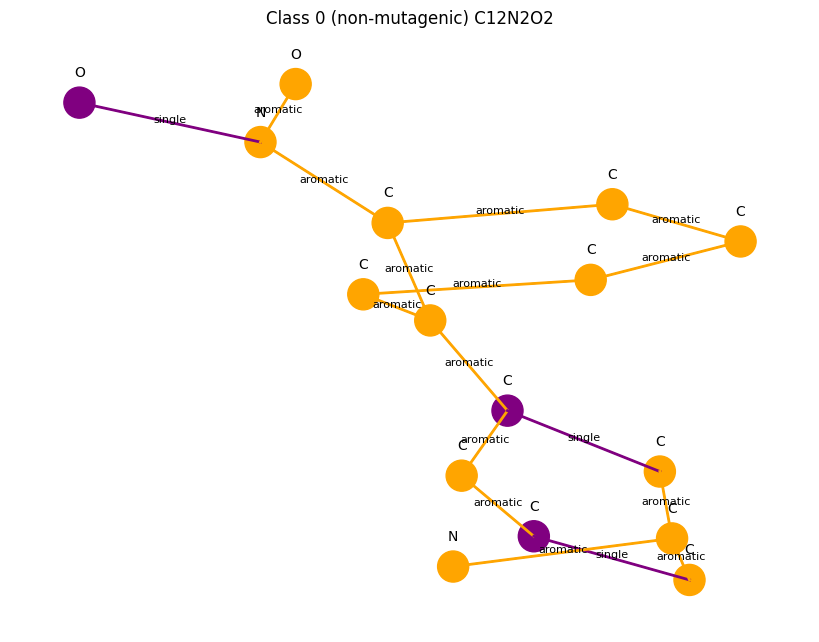

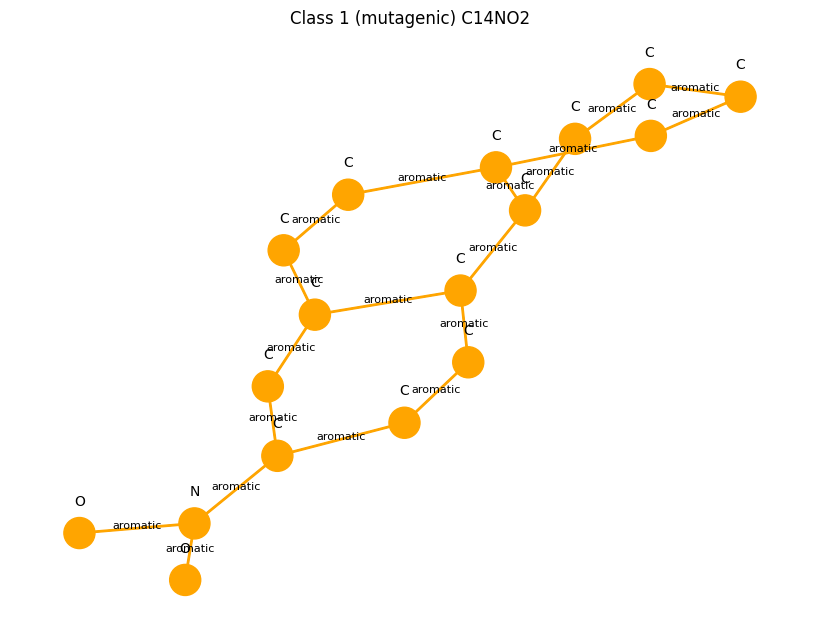

In [73]:
from random import choice

# Select one graph from each class
graph_class_0 = choice([graph for graph in MUTAG if graph.y.item() == 0])
graph_class_1 = choice([graph for graph in MUTAG if graph.y.item() == 1])

chemical_info_class_0, node_info_class_0, edge_info_class_0 = get_labels(graph_class_0)
chemical_info_class_1, node_info_class_1, edge_info_class_1 = get_labels(graph_class_1)
# Plot the selected graphs# Plot the selected graphs without the node_color argument
plot_graph(graph_class_0, title=f"Class 0 (non-mutagenic) {chemical_info_class_0}", edge_color_map=edge_color_map)
plot_graph(graph_class_1, title=f"Class 1 (mutagenic) {chemical_info_class_1}", edge_color_map=edge_color_map)

In [74]:
def plot_graph(graph, title="Graph", node_color='lightblue'):
    G = nx.Graph()
    
    edge_index = graph.edge_index.cpu().numpy()
    for i in range(edge_index.shape[1]):
        G.add_edge(edge_index[0][i].item(), edge_index[1][i].item())  # Ensure indices are integers

    # Create node labels based on the graph's node features
    pos = nx.spring_layout(G, k = 0.5)  # You can choose a layout algorithm like spring_layout
    plt.figure(figsize=(8, 6))

    # Set all nodes to the specified color
    node_colors = [node_color] * graph.num_nodes  # All nodes will have the same color

    # Draw nodes
    nx.draw(G, pos, with_labels=False, node_size=500, node_color=node_colors, font_weight='bold')
    
    # Add node labels (using node types)
    node_labels = {i: node_names[graph.x[i].argmax().item()] for i in range(graph.num_nodes)}
    for node, label in node_labels.items():
        plt.text(pos[node][0], pos[node][1] + 0.1, label, fontsize=10, ha='center')

    # Draw edges
    for i, (u, v) in enumerate(G.edges()):
        plt.plot(*zip(pos[u], pos[v]), color='black', linewidth=2)  # Draw edges in black

    # Add edge labels (using edge types)
    for i, (u, v) in enumerate(G.edges()):
        mid_x = (pos[u][0] + pos[v][0]) / 2
        mid_y = (pos[u][1] + pos[v][1]) / 2
        edge_label = edge_names[graph.edge_attr[i].argmax().item()]
        plt.text(mid_x, mid_y, edge_label, fontsize=8, ha='center', color='black', 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.title(title)
    plt.show()

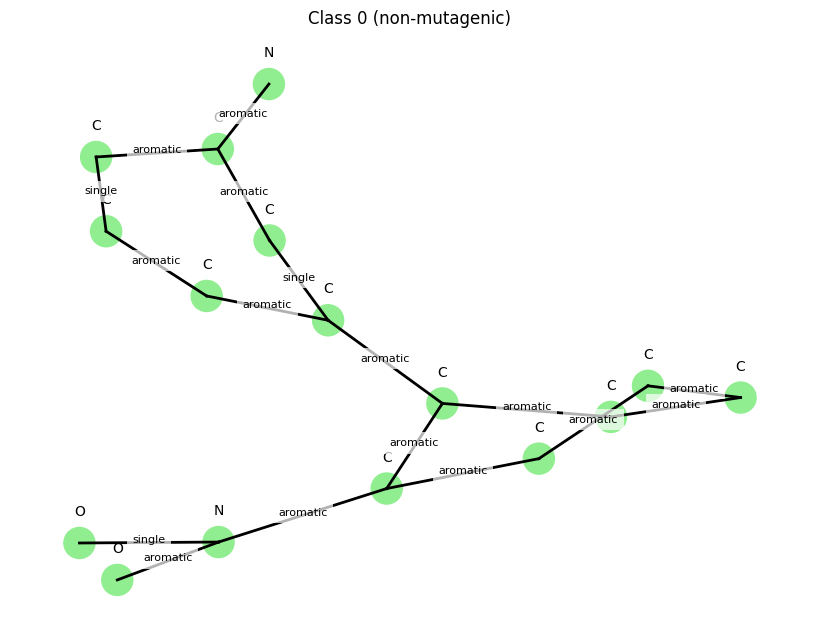

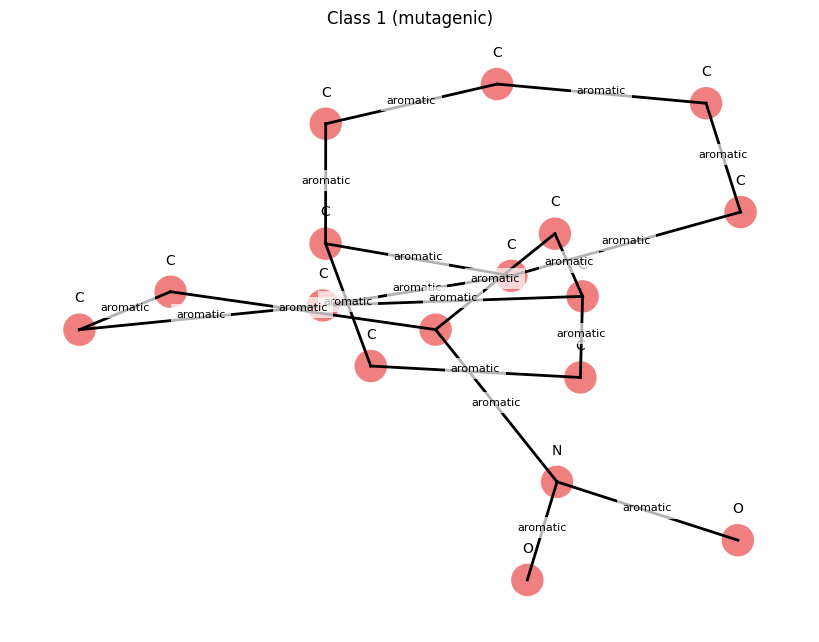

In [75]:
# Call the plot_graph function with a specified node color
plot_graph(graph_class_0, title="Class 0 (non-mutagenic)", node_color='lightgreen')
plot_graph(graph_class_1, title="Class 1 (mutagenic)", node_color='lightcoral')

In [76]:
train_data, test_data = train_test_split(
    MUTAG,
    test_size = .2,
    random_state = 42
)

In [77]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, shuffle = False)

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import DataLoader  # Import the correct DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.transforms import NormalizeFeatures
import torch.nn.functional as F

# Step 1: Load the MUTAG dataset
dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG', transform=NormalizeFeatures())

# Step 2: Split the dataset into train and test sets (80-20 split)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Step 3: Create data loaders (using the correct DataLoader from torch_geometric)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 4: Define the GCN model with graph pooling
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, out_channels)
    
    def forward(self, x, edge_index, batch):
        # First Graph Convolution layer
        x = F.relu(self.conv1(x, edge_index))
        # Second Graph Convolution layer
        x = F.relu(self.conv2(x, edge_index))
        # Global pooling to aggregate node features into graph-level features
        x = global_mean_pool(x, batch)
        # Fully connected layer for graph classification
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

# Step 5: Initialize the model, optimizer, and loss function
model = GCN(in_channels=dataset.num_features, hidden_channels=64, out_channels=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Step 6: Train the model
def train():
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for data in train_loader:
        optimizer.zero_grad()
        # Get the input data for each graph
        x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
        # Forward pass
        out = model(x, edge_index, batch)
        # Compute the loss
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += pred.eq(y).sum().item()
        total += y.size(0)
    
    accuracy = correct / total
    return total_loss / len(train_loader), accuracy

# Step 7: Test the model
def test():
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in test_loader:
            x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
            out = model(x, edge_index, batch)
            pred = out.argmax(dim=1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
    
    accuracy = correct / total
    return accuracy

# Step 8: Training loop
num_epochs = 100
best_acc = 0

for epoch in range(1, num_epochs+1):
    loss, train_acc = train()
    test_acc = test()
    
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Acc: {test_acc*100:.2f}%')
    
    if test_acc > best_acc:
        best_acc = test_acc
        # Optionally save the model with the best accuracy
        # torch.save(model.state_dict(), 'best_gcn_model.pth')

print(f'Best Test Accuracy: {best_acc*100:.2f}%')


Epoch: 001, Loss: 0.6445, Train Acc: 66.67%, Test Acc: 68.42%
Epoch: 002, Loss: 0.6263, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 003, Loss: 0.6214, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 004, Loss: 0.6074, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 005, Loss: 0.5970, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 006, Loss: 0.5915, Train Acc: 66.67%, Test Acc: 68.42%
Epoch: 007, Loss: 0.5852, Train Acc: 66.67%, Test Acc: 71.05%
Epoch: 008, Loss: 0.5690, Train Acc: 67.33%, Test Acc: 78.95%
Epoch: 009, Loss: 0.5775, Train Acc: 71.33%, Test Acc: 76.32%
Epoch: 010, Loss: 0.5635, Train Acc: 69.33%, Test Acc: 78.95%
Epoch: 011, Loss: 0.5468, Train Acc: 72.67%, Test Acc: 76.32%
Epoch: 012, Loss: 0.5528, Train Acc: 70.00%, Test Acc: 76.32%
Epoch: 013, Loss: 0.5615, Train Acc: 71.33%, Test Acc: 78.95%
Epoch: 014, Loss: 0.5394, Train Acc: 71.33%, Test Acc: 81.58%
Epoch: 015, Loss: 0.5417, Train Acc: 70.00%, Test Acc: 78.95%
Epoch: 016, Loss: 0.5365, Train Acc: 70.67%, Test Acc: 78.95%
Epoch: 0

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.data import DataLoader  # Import the correct DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.transforms import NormalizeFeatures
import torch.nn.functional as F

# Step 1: Load the MUTAG dataset
dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG', transform=NormalizeFeatures())

# Step 2: Split the dataset into train and test sets (80-20 split)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42, stratify='y')

# Step 3: Create data loaders (using the correct DataLoader from torch_geometric)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 4: Define the GraphSAGE model with graph pooling
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        # GraphSAGE convolution layers
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        # Fully connected layer for graph classification
        self.fc = nn.Linear(hidden_channels, out_channels)
    
    def forward(self, x, edge_index, batch):
        # First GraphSAGE layer
        x = F.relu(self.conv1(x, edge_index))
        # Second GraphSAGE layer
        x = F.relu(self.conv2(x, edge_index))
        # Global pooling to aggregate node features into graph-level features
        x = global_mean_pool(x, batch)
        # Fully connected layer for graph classification
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

# Step 5: Initialize the model, optimizer, and loss function
model = GraphSAGE(in_channels=dataset.num_features, hidden_channels=64, out_channels=dataset.num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Step 6: Train the model
def train():
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for data in train_loader:
        optimizer.zero_grad()
        # Get the input data for each graph
        x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
        # Forward pass
        out = model(x, edge_index, batch)
        # Compute the loss
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += pred.eq(y).sum().item()
        total += y.size(0)
    
    accuracy = correct / total
    return total_loss / len(train_loader), accuracy

# Step 7: Test the model
def test():
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in test_loader:
            x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
            out = model(x, edge_index, batch)
            pred = out.argmax(dim=1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
    
    accuracy = correct / total
    return accuracy

# Step 8: Training loop
num_epochs = 100
best_acc = 0

for epoch in range(1, num_epochs+1):
    loss, train_acc = train()
    test_acc = test()
    
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Acc: {test_acc*100:.2f}%')
    
    if test_acc > best_acc:
        best_acc = test_acc
        # Optionally save the model with the best accuracy
        torch.save(model.state_dict(), 'best_graphsage_model.pth')

print(f'Best Test Accuracy: {best_acc*100:.2f}%')


InvalidParameterError: The 'stratify' parameter of train_test_split must be an array-like or None. Got 'y' instead.

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.nn import GCNConv, SAGEConv, global_mean_pool
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.transforms import NormalizeFeatures
import torch.nn.functional as F

# Base class for graph models
class BaseGraphModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(BaseGraphModel, self).__init__()
        self.hidden_channels = hidden_channels
        self.out_channels = out_channels
        self.fc = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, batch):
        raise NotImplementedError("Forward method not implemented!")

    def common_forward(self, x, batch):
        # Global pooling to aggregate node features into graph-level features
        x = global_mean_pool(x, batch)
        # Fully connected layer for graph classification
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

# GCN model inheriting from BaseGraphModel
class GCN(BaseGraphModel):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__(in_channels, hidden_channels, out_channels)
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.common_forward(x, batch)

# GraphSAGE model inheriting from BaseGraphModel
class GraphSAGE(BaseGraphModel):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__(in_channels, hidden_channels, out_channels)
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.common_forward(x, batch)

# Load the MUTAG dataset
dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG', transform=NormalizeFeatures())

# Split the dataset into train and test sets (80-20 split)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, optimizer, and loss function
model = GCN(in_channels=dataset.num_features, hidden_channels=64, out_channels=dataset.num_classes)
# model = GraphSAGE(in_channels=dataset.num_features, hidden_channels=64, out_channels=dataset.num_classes)  # Uncomment to use GraphSAGE
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Train the model
def train():
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for data in train_loader:
        optimizer.zero_grad()
        x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
        out = model(x, edge_index, batch)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += pred.eq(y).sum().item()
        total += y.size(0)
    
    accuracy = correct / total
    return total_loss / len(train_loader), accuracy

# Test the model
def test():
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in test_loader:
            x, edge_index, y, batch = data.x, data.edge_index, data.y, data.batch
            out = model(x, edge_index, batch)
            pred = out.argmax(dim=1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
    
    accuracy = correct / total
    return accuracy

# Training loop
num_epochs = 100
best_acc = 0

for epoch in range(1, num_epochs+1):
    loss, train_acc = train()
    test_acc = test()
    
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Acc: {test_acc*100:.2f}%')
    
    if test_acc > best_acc:
        best_acc = test_acc
        # Optionally save the model with the best accuracy
        # torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Test Accuracy: {best_acc*100:.2f}%')

Epoch: 001, Loss: 0.6543, Train Acc: 59.33%, Test Acc: 68.42%
Epoch: 002, Loss: 0.6375, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 003, Loss: 0.6231, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 004, Loss: 0.6171, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 005, Loss: 0.6142, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 006, Loss: 0.6007, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 007, Loss: 0.5942, Train Acc: 66.00%, Test Acc: 68.42%
Epoch: 008, Loss: 0.5942, Train Acc: 66.67%, Test Acc: 68.42%
Epoch: 009, Loss: 0.5768, Train Acc: 67.33%, Test Acc: 71.05%
Epoch: 010, Loss: 0.5775, Train Acc: 67.33%, Test Acc: 76.32%
Epoch: 011, Loss: 0.5751, Train Acc: 69.33%, Test Acc: 81.58%
Epoch: 012, Loss: 0.5592, Train Acc: 70.00%, Test Acc: 71.05%
Epoch: 013, Loss: 0.5815, Train Acc: 68.67%, Test Acc: 81.58%
Epoch: 014, Loss: 0.5549, Train Acc: 67.33%, Test Acc: 73.68%
Epoch: 015, Loss: 0.5561, Train Acc: 72.67%, Test Acc: 78.95%
Epoch: 016, Loss: 0.5434, Train Acc: 70.67%, Test Acc: 78.95%
Epoch: 0